In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
city_sales = pd.read_csv('datos/city_sales.csv', sep=';')
pois = pd.read_csv('datos/pois.csv', sep=';')
polygons = pd.read_csv('datos/polygons.csv', sep=';')


city_sales.head(10)


ASSETID  PERIOD      PRICE    UNITPRICE  CONSTRUCTEDAREA  \
0  A15019136831406238029  201803   126000.0  2680.851064               47   
1   A6677225905472065344  201803   235000.0  4351.851852               54   
2  A13341979748618524775  201803   373000.0  4973.333333               75   
3   A4775182175615276542  201803   284000.0  5916.666667               48   
4   A2492087730711701973  201803   228000.0  4560.000000               50   
5  A18372428154681111419  201803   498000.0  3921.259843              127   
6   A4705946410795464036  201803   225000.0  6428.571429               35   
7   A8243762537477781718  201803   365000.0  3650.000000              100   
8   A9587449507628658013  201803   425000.0  6071.428571               70   
9   A3694300518337702967  201803  3187000.0  8852.777778              360   

   ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  ...  \
0           1           1           0        1                   1  ...   
1           1           1           0        0                   0  ...   
2           2           1           0        0                   1  ...   
3           1           1           0        1                   1  ...   
4           0           1           0        0                   0  ...   
5           3           2           0        1                   0  ...   
6           0           1           0        1                   0  ...   
7           2           1           1        1                   0  ...   
8           1           1           0        1                   0  ...   
9           4           3           1        1                   1  ...   

   BUILTTYPEID_2  BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  DISTANCE_TO_METRO  \
0              1              0                 8.058429           0.872075   
1              0              1                 0.876369           0.116382   
2              0              1                 0.907479           0.139109   
3              0              1                 0.845462           0.144299   
4              0              1                 1.250231           0.337098   
5              1              0                 0.541773           0.161436   
6              0              1                 0.859565           0.126995   
7              0              1                 1.346115           0.263445   
8              0              1                 0.753575           0.437191   
9              0              1                 0.779228           0.312616   

   DISTANCE_TO_MAINSTREET  LONGITUDE   LATITUDE  \
0                6.868677  -3.766933  40.362485   
1                1.544125  -3.710725  40.422430   
2                1.608444  -3.711571  40.422190   
3                1.516166  -3.710440  40.422251   
4                1.794136  -3.714340  40.408741   
5                1.168126  -3.707522  40.412639   
6                1.517437  -3.710395  40.422450   
7                1.762922  -3.714126  40.407409   
8                1.548310  -3.712390  40.414870   
9                1.609466  -3.712945  40.417236   

                                 geometry    CITY  MAINSTREET  
0  c(-3.76693282740492, 40.3624847687389)  Madrid  CASTELLANA  
1  c(-3.71072465730388, 40.4224298907482)  Madrid  CASTELLANA  
2    c(-3.711570866261, 40.4221904507903)  Madrid  CASTELLANA  
3  c(-3.71043986942694, 40.4222514604856)  Madrid  CASTELLANA  
4  c(-3.71434022421324, 40.4087408924555)  Madrid  CASTELLANA  
5  c(-3.70752185145011, 40.4126386908556)  Madrid  CASTELLANA  
6  c(-3.71039480572019, 40.4224499360928)  Madrid  CASTELLANA  
7  c(-3.71412579045626, 40.4074088773041)  Madrid  CASTELLANA  
8  c(-3.71238952690619, 40.4148700711265)  Madrid  CASTELLANA  
9  c(-3.71294489805374, 40.4172360255127)  Madrid  CASTELLANA  

[10 rows x 44 columns]

In [2]:
city_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189923 entries, 0 to 189922
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ASSETID                        189923 non-null  object 
 1   PERIOD                         189923 non-null  int64  
 2   PRICE                          189923 non-null  float64
 3   UNITPRICE                      189923 non-null  float64
 4   CONSTRUCTEDAREA                189923 non-null  int64  
 5   ROOMNUMBER                     189923 non-null  int64  
 6   BATHNUMBER                     189923 non-null  int64  
 7   HASTERRACE                     189923 non-null  int64  
 8   HASLIFT                        189923 non-null  int64  
 9   HASAIRCONDITIONING             189923 non-null  int64  
 10  AMENITYID                      189923 non-null  int64  
 11  HASPARKINGSPACE                189923 non-null  int64  
 12  ISPARKINGSPACEINCLUDEDINPRICE 

In [3]:
# Paso 2: Seleccionar características relevantes
# Nos enfocamos en variables clave como precio, área, y número de habitaciones.
features = city_sales[['PRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'UNITPRICE']].dropna()

In [4]:
# Paso 3: Escalar las variables para igualar magnitudes
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [5]:
# Submuestrear los datos (por ejemplo, 10,000 filas)
#sampled_features = features.sample(n=10000, random_state=42)
#sampled_scaled = scaler.fit_transform(sampled_features)

# Aplicar el clustering jerárquico a la muestra
#linkage_matrix = linkage(sampled_scaled, method='ward')

# Graficar el dendrograma
#plt.figure(figsize=(10, 7))
#dendrogram(linkage_matrix)
#plt.title('Dendrograma para Clustering Jerárquico (Muestra)')
#plt.xlabel('Índices de las muestras')
#plt.ylabel('Distancia')
#plt.show()


Cluster
 5      49952
-1      40772
 9      30435
 4      19505
 1       7393
        ...  
 28        51
 165       51
 119       50
 171       50
 149       50
Name: count, Length: 221, dtype: int64
                PRICE  CONSTRUCTEDAREA  ROOMNUMBER    UNITPRICE
Cluster                                                        
-1       4.092827e+05       112.747106    3.084936  3336.011620
 0       1.050225e+06       248.579439    6.000000  4034.824047
 1       8.747430e+05       206.264169    5.000000  4045.725758
 2       2.054006e+05        57.232981    0.000000  4043.798638
 3       9.395210e+05       245.378151    8.000000  3906.327698
...               ...              ...         ...          ...
 215     2.174337e+05        85.000000    3.000000  2558.043217
 216     1.786535e+05        90.000000    3.000000  1985.039056
 217     2.971159e+05        90.000000    3.000000  3301.287554
 218     1.513533e+05        85.000000    3.000000  1780.626687
 219     8.602996e+04        85

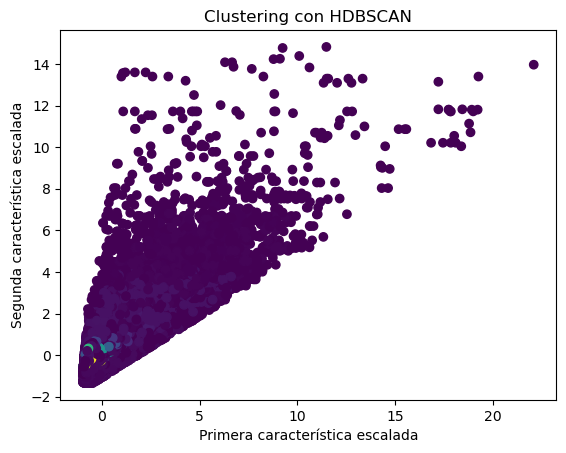

Archivo guardado con las clasificaciones.


In [6]:
import hdbscan
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Escalar los datos
features = city_sales[['PRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'UNITPRICE']].dropna()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Paso 2: Aplicar HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=10)
city_sales['Cluster'] = clusterer.fit_predict(features_scaled)

# Paso 3: Análisis de los resultados
print(city_sales['Cluster'].value_counts())
print(city_sales.groupby('Cluster')[['PRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'UNITPRICE']].mean())

# Paso 4: Visualización de los clusters
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=city_sales['Cluster'], cmap='viridis')
plt.title('Clustering con HDBSCAN')
plt.xlabel('Primera característica escalada')
plt.ylabel('Segunda característica escalada')
plt.show()

# Guardar resultados
city_sales.to_csv('city_sales_hdbscan_clusters.csv', index=False)
print("Archivo guardado con las clasificaciones.")


**Resumen del Clustering**

Cluster -1:
 - Es el grupo de ruido o viviendas que no pudieron clasificarse en un cluster específico.
 - Representa 40,772 viviendas (~20% del total).
 - Características:
   - Precio promedio: ~409,282 €
   - Área promedio: ~112.75 m²
   - Habitaciones promedio: ~3
   - Precio por metro cuadrado: ~3,336 €/m²

Cluster 5 (más grande):
 - Contiene ~49,952 viviendas (~24% del total).
 - Este cluster puede representar viviendas con características estándar o comunes.

Clusters pequeños (tamaño 50):
 - Hay muchos clusters pequeños, con 50 viviendas cada uno.
 - Estas agrupaciones pueden corresponder a propiedades con características únicas o nichos.

Clusters específicos (ejemplo 0 y 1):
 - Cluster 0: Viviendas premium con un precio promedio de ~1,050,225 € y áreas grandes (~248 m²).
 - Cluster 1: Propiedades premium de menor tamaño, pero con precios altos (~874,743 €) y ~206 m².


Vamos a profundizar en el análisis de los clusters geográficamente, centrándonos en dos aspectos principales:

Visualización geográfica: Mostrar la distribución de los clusters en un mapa utilizando sus coordenadas geográficas (LATITUDE y LONGITUDE).
Identificación de clusters premium y asequibles: Filtrar los clusters con los precios promedio más altos y más bajos, y resaltarlos en un mapa.

In [7]:
import folium
import pandas as pd

# Paso 1: Preparar datos geográficos
geo_data = city_sales[['Cluster', 'LATITUDE', 'LONGITUDE', 'PRICE', 'CONSTRUCTEDAREA', 'UNITPRICE']].dropna()

# Paso 2: Identificar clusters premium y asequibles
cluster_summary = geo_data.groupby('Cluster').mean().reset_index()
premium_clusters = cluster_summary.nlargest(5, 'PRICE')  # 5 clusters más caros
affordable_clusters = cluster_summary.nsmallest(5, 'PRICE')  # 5 clusters más baratos

print("Clusters Premium:")
print(premium_clusters)

print("Clusters Asequibles:")
print(affordable_clusters)

# Paso 3: Crear un mapa interactivo con folium
m = folium.Map(location=[geo_data['LATITUDE'].mean(), geo_data['LONGITUDE'].mean()], zoom_start=12)

# Agregar puntos para cada propiedad
for _, row in geo_data.iterrows():
    cluster_color = 'blue'  # Clusters estándar
    if row['Cluster'] in premium_clusters['Cluster'].values:
        cluster_color = 'green'  # Premium
    elif row['Cluster'] in affordable_clusters['Cluster'].values:
        cluster_color = 'red'  # Asequibles

    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=3,
        color=cluster_color,
        fill=True,
        fill_color=cluster_color,
        fill_opacity=0.6,
    ).add_to(m)

# Guardar el mapa
m.save('clusters_map.html')
print("Mapa guardado como 'clusters_map.html'.")


Clusters Premium:
    Cluster   LATITUDE  LONGITUDE         PRICE  CONSTRUCTEDAREA    UNITPRICE
9         8  40.432022  -3.687452  2.508464e+06       306.376812  8207.676665
7         6  40.621438  -2.548195  1.567706e+06       303.725490  5183.313570
12       11  40.669168  -1.936526  1.207368e+06       220.807018  5467.938249
15       14  40.870086  -0.874087  1.158209e+06       175.589147  6599.268130
1         0  40.584562  -0.965245  1.050225e+06       248.579439  4034.824047
Clusters Asequibles:
     Cluster   LATITUDE  LONGITUDE         PRICE  CONSTRUCTEDAREA   UNITPRICE
141      140  39.478211  -0.379498  43710.280374        69.700935  627.319430
181      180  39.552500  -0.647469  52705.882353        65.000000  810.859729
194      193  39.555507  -0.660918  70925.000000        72.437500  978.831336
192      191  39.517625  -0.559771  76472.727273        95.000000  804.976077
57        56  39.483374  -0.439692  78421.052632       105.719298  741.310894
Mapa guardado como 'clust

**Explicación**:

Datos geográficos:
- Usamos las columnas LATITUDE y LONGITUDE para representar propiedades en un mapa.
- Calculamos los clusters más caros y baratos basándonos en el precio promedio.

Mapa interactivo con Folium:
- Cada propiedad se visualiza como un marcador.
- Colores:
  - Verde: Clusters premium (precios más altos).
  - Rojo: Clusters asequibles (precios más bajos).
  - Azul: Clusters estándar.

Salida del Mapa:
- El mapa interactivo se guarda como clusters_map.html en el directorio de trabajo.
- Ábrelo en tu navegador para explorar los datos.

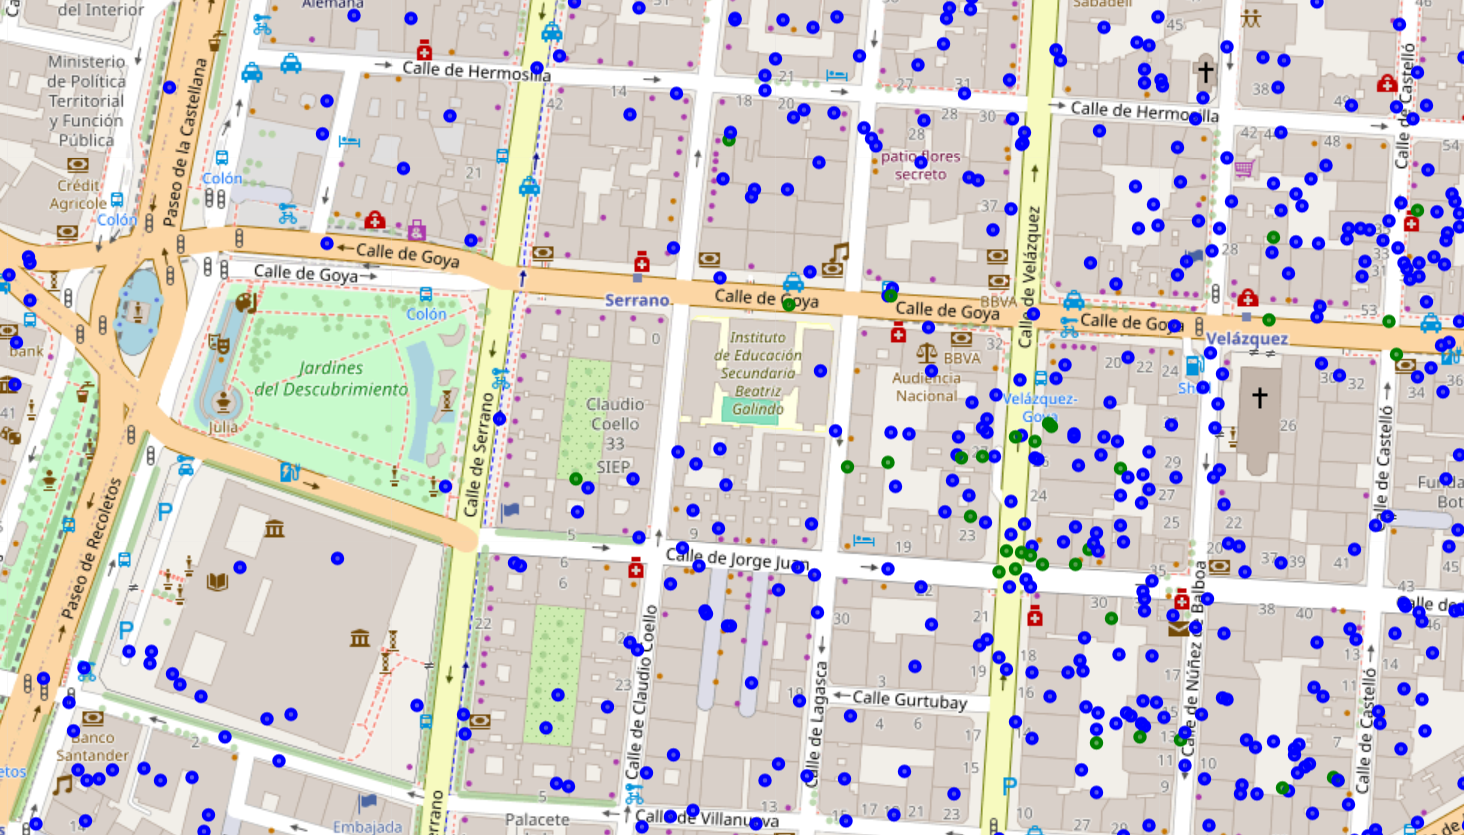

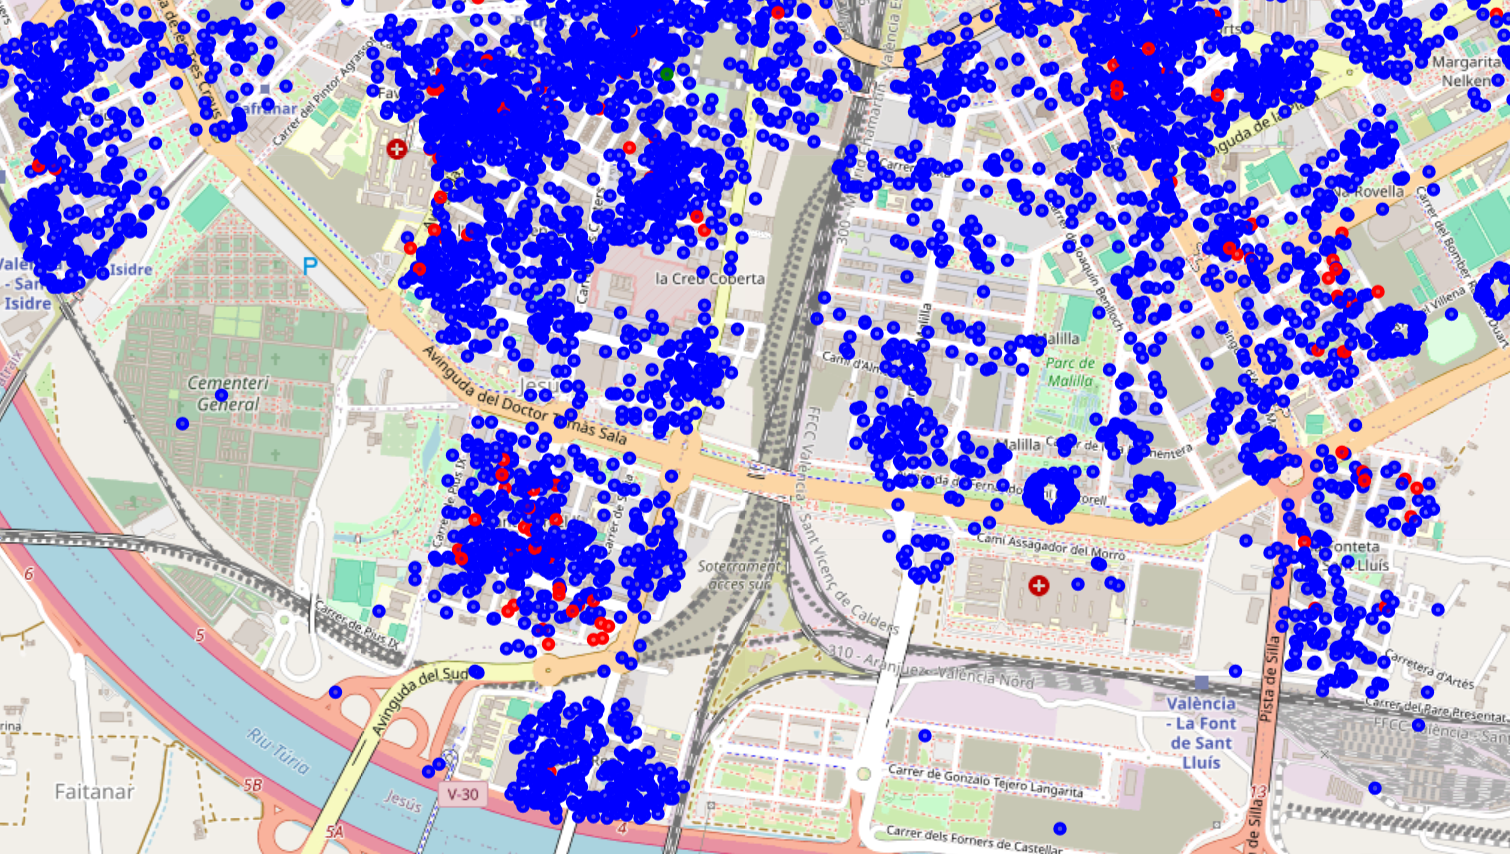